# Inflated Fandango Movie Ratings

Fandango Media LLC is an online movie ticketing and streaming media company that collects and aggregates ratings on their movies and provides them to the public through their subsidiary [Rotten Tomatoes](https://www.rottentomatoes.com/).  
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence suggesting that Fandango's rating system was biased and dishonest. He published his analysis in this article ["Be Suspicious of Online Movie Ratings, Especially Fandango's"](https://fivethirtyeight.com/features/fandango-movies-ratings/). Hickney scraped the data from their website and noticed a discrepancy between the number of stars on the user's page and the actual rating on their corresponding HTML page.

According to his analysis he was able to find that:
- The actual rating was almost always rounded up to the nearest half-star. 
- 8% of the ratings were rounded to the nearest whole star. 
- For one movie rating, there was a rating of 4 on the HTML of the page; however, for some unexplained reason, the web page displayed 5 stars.
This caused the ratings distribution to be shifted to the right of the actual ratings, suggesting that Fandango inflated them. 

Fandango officially claimed that it was due to a rounding error in their system, and that it was not intentional. Unfortunately, their HTML pages are no longer displayed, so the direct comparison between the HTML rating and number of stars on their website can't be confirmed in the same manner as Hickney's analysis. 

## Fandango Ratings After Hickey's Analysis
This project is for the completion of the [DataQuest.io](https://www.dataquest.io/) "Statistics Fundamentals" module; the fifteenth in a series for the completing Data Science course path. For this assignment, questions will be answered using the material focused on up to this point in the course, with particular consideration for the new material introduced in this module. This material includes fundamental statistics including:

- Sampling
- Statistical Variable Types
- Scales of Measurement
- Frequency Distributions

The purpose of this project is to find out if there have been any changes to the Fandango rating system since Hickey's analysis.

## Results Summary
Distribution analysis showed a definite downward trend in ratings from 2015 to 2016. Statistical aggregation solidified the finding, particularly the mode, which was a half point lower. It appears that Fandango, did indeed, fix the rounding error. 

## Data Source and Analysis
Walt Hickey 2015 data was made the data he analyzed publicly available on this GitHub [link](https://github.com/fivethirtyeight/data/tree/master/fandango).
A Dataquest.io employee collected movie data ratings for movies released in 2016 and 2017, also available through a GitHub [link](https://github.com/mircealex/Movie_ratings_2016_17). 
Both datasets will be used for comparison purposes.

The relevant columns that will be used from each dataset will be extracted for the scope of this project.  The column names and descriptions are as follows: 



#### Relevant columns from dataset provided by Hickney:


|Column Name|Details|
|:-------  | :--- |
|FILM|The film in question|
|Fandango_Stars|The number of stars the film had on its Fandango movie page|
|Fandango_Ratingvalue|Value for the film, pulled from the HTML of each page| 
|Fandango_votes|The number of votes the film had on Fandango|                     |
|Fandango_Difference|Difference between Fandango_Stars and the actual Fandango_Ratingvalue|






In [249]:
# Style table
%%html
<style>
table {float:left}
</style>

SyntaxError: invalid syntax (<ipython-input-249-406cbb921eab>, line 3)

#### Relevant columns from dataset provided by Dataquest.io:

|Column Name|Details|
|:-------| :--- |
|movie|The name of the movie|
|year|The release year of the movie|
|fandango|The Fandango rating of the movie (user score)|

In [ ]:
# Style table
%%html
<style>
table {float:left}
</style>

In [ ]:
# Import the libraries and read in the data
import pandas as pd
import numpy as np
fandango= pd.read_csv('fandango_score_comparison.csv')
movies = pd.read_csv('movie_ratings_16_17.csv')

In [ ]:
# Select and display the relevant columns for first dataset
fandango_before = fandango[['FILM','Fandango_Stars','Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_before

In [ ]:
# Select and display the relevant columns for first dataset 
fandango_after = movies[['movie', 'year', 'fandango']]
fandango_after

In [ ]:
fandango_before['Fandango_Stars'].describe()

In [ ]:
fandango_after['fandango'].describe()

##  Sample Population and Data Correlation Conundrum
The [README.md](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) page from Hickney's dataset,
states that the data contains ***every*** film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and ***at least 30 fan reviews*** on Fandango.  Unfortunately, according to the [README.md](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) page from Dataquest, theirs does not contain the same sample population. The Dataquest set contains movie ratings data for ***214 of the most popular films ("with a significant number of votes")***. So, neither dataset was randomly sampled. They both used selective sampling to achieve their own objectives. 

Without random sampling, the scope and goal of this project had to be modified. One option was to go to the web and scrape for more data. But, that would be impractical and time consuming. 
The terms Dataquest used to describe the sample population was "most popular." This was vague, so it required definition before proceeding. Since Hackney used the metric ***at least 30 fan reviews***  this was used as benchmark to define "popular" in terms of Dataquest.io set. With this as an acceptable proxy from the original goal, 10 samples from the Dataquest set were taken and compare to the list of movies with the number of the reviews on the Fandango's rating site. As of this writing in 2021, all the movies in this sample had at least 30 reviews.

In [ ]:
# Random sample of 10 taken
fandango_after_over_30 = fandango_after.sample(10, random_state = 1)
fandango_after_over_30

In [ ]:
# Tabulate 2021 Fandango ratings with the review count
count_list = [59, 232, 21, 178, 340, 54, 109, 344, 148, 418]
fandango_after_over_30['Review Count'] = count_list
fandango_after_over_30

## Comparing Ratings Distributions for 2015 and 2016
Some quick data cleaning tasks were required to isolate just 2015 and 2016 data, then, kernel density plots were created from those two years to better visualize the ratings distributions. Visually, one can see a clear downward trend from 2016 than 2015.  

The data was granularised further into ratings distributions then the ratings for the subsequent years were normalized into table.  The table showed the two higher ratings: 5.0 down 6% from 2015 to 2016; and 4.5 down 13% from 2015 to 2016. At the low end of the ratings: 3% of the ratings for 2016 had a 2.5. By contrast, There were no ratings below 3.0 for the year 2015. This data also confirmed a downward shift in the ratings from 2015 to 2016. 

In [ ]:
# Isolate first dataset to just 2015
regExp = r"(2015)"
fandango_2015 = fandango_before.copy()
fandango_2015['Year'] = fandango_2015['FILM'].str.extract(regExp)
fandango_2015 = fandango_2015.dropna()
fandango_2015

In [250]:
# Isolate second dataset to just 2016
fandango_2016 = fandango_after[fandango_after['year'] == 2016]
fandango_2016

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5
208,Why Him?,2016,4.0
209,X-Men: Apocalypse,2016,4.0
212,Zoolander 2,2016,2.5


In [251]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

<AxesSubplot:ylabel='Density'>

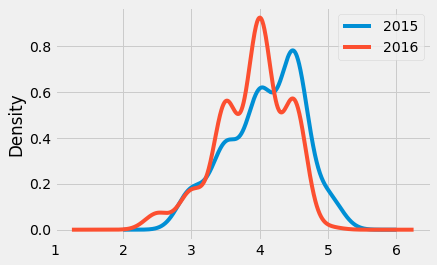

In [252]:
# Create a distribution plot of the two datasets
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

In [253]:
# Tabulate percent counts for each rating and take the difference
combined = fandango_2016['fandango'].value_counts(normalize = True).sort_index(ascending = False).round(2).rename_axis('ratings').to_frame('percent of counts 2016')*100
combined['percent of counts 2015'] = fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index(ascending = False).round(2).to_frame()*100
combined['percent count difference'] = combined['percent of counts 2016'] - combined['percent of counts 2015']
combined

,percent of counts 2016,percent of counts 2015,percent count difference
ratings,,,
5.0,1.0,7.0,-6.0
4.5,25.0,38.0,-13.0
4.0,40.0,29.0,11.0
3.5,24.0,18.0,6.0
3.0,7.0,9.0,-2.0
2.5,3.0,NaN,NaN


## Comparing the Mean, Median and Mode for 2015 and 2016
The distribution information derived above was highly informative; but to be completely thorough in our analysis the Mean, Median and Mode for each year were compared to look for additional information. From 2015 to 2016, mean dropped 4.84%; the mode changed a complete half point from 4.5 stars to 4.0 stars. The median remained constant. 

In [254]:
# Find mean, median and mode for both datasets and tabulate
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary['rating change'] = summary['2015']-summary['2016']
summary.index = ['mean', 'median', 'mode']
summary.round(2)

,2015,2016,rating change
mean,4.09,3.89,0.2
median,4.00,4.00,0.0
mode,4.50,4.00,0.5


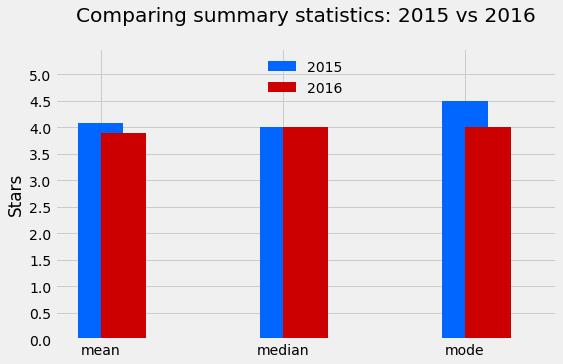

In [255]:
# Plot mean, median and mode
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

## Conclusion
The goal of determining if there were any directional trends between Fandango's ratings for popular movies in 2015 and popular movies in 2016 was achieved. There was an initial setback during the data exploration phase when it was found that both datasets were independently, selectively sampled. So, as an acceptable proxy, 10 samples from the Dataquest set were taken and compare to the list of movies with the number of the reviews on Fandango's rating site. There was a definite downward trend in ratings from 2015 to 2016. Statistical aggregation solidified the finding, particularly the mode, which was a half point lower. It appears that Fandango, did indeed, fix the rounding error.  